In [38]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [39]:
train_values = pd.read_csv('train_values.csv', index_col='building_id')
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')

In [40]:
test_values = pd.read_csv('test_values.csv', index_col='building_id')

In [41]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

In [42]:
columnas = ['land_surface_condition',
            'foundation_type',
            'roof_type',
            'ground_floor_type',
            'other_floor_type',
            'position',
            'plan_configuration',
            'legal_ownership_status',
            'geo_level_1_id',
            'geo_level_2_id',
            'geo_level_3_id'];

In [43]:
for row in columnas:
  # Calculamos la frecuencia por cada grado de cada valor de la variable
  Auxiliar = test_values.groupby([row]).size()/len(test_values);

  # Reemplazamos la columna por la columna de frecuencias
  test_values.loc[:,row] = test_values[row].map(Auxiliar);

In [44]:
for row in columnas:
  # Calculamos la frecuencia por cada grado de cada valor de la variable
  Auxiliar = train_values.groupby([row]).size()/len(train_values);

  # Reemplazamos la columna por la columna de frecuencias
  train_values.loc[:,row] = train_values[row].map(Auxiliar);

In [45]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   geo_level_1_id                          260601 non-null  float64
 1   geo_level_2_id                          260601 non-null  float64
 2   geo_level_3_id                          260601 non-null  float64
 3   count_floors_pre_eq                     260601 non-null  int64  
 4   age                                     260601 non-null  int64  
 5   area_percentage                         260601 non-null  int64  
 6   height_percentage                       260601 non-null  int64  
 7   land_surface_condition                  260601 non-null  float64
 8   foundation_type                         260601 non-null  float64
 9   roof_type                               260601 non-null  float64
 10  ground_floor_type                      

In [48]:
train_values.columns.to_list()

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_sec

In [49]:
selected_features = ['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other'];
train_values_subset = train_values[selected_features]

In [50]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,0.093557,0.001036,0.000142,2,30,6,5,0.831758,0.841117,0.701617,...,0,0,0,0,0,0,0,0,0,0
28830,0.073215,0.000764,0.000061,2,10,8,7,0.031911,0.841117,0.701617,...,0,0,0,0,0,0,0,0,0,0
94947,0.057133,0.006754,0.000522,2,10,5,5,0.831758,0.841117,0.701617,...,0,0,0,0,0,0,0,0,0,0
590882,0.023991,0.000787,0.000119,2,10,6,5,0.831758,0.841117,0.701617,...,0,0,0,0,0,0,0,0,0,0
201944,0.031542,0.003983,0.000468,3,30,8,9,0.831758,0.841117,0.701617,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,0.021581,0.000445,0.000054,1,55,6,3,0.136331,0.841117,0.701617,...,0,0,0,0,0,0,0,0,0,0
669485,0.083703,0.001002,0.000188,2,0,6,5,0.831758,0.841117,0.701617,...,0,0,0,0,0,0,0,0,0,0
602512,0.083703,0.001278,0.000084,3,55,6,7,0.831758,0.841117,0.236285,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(train_values_subset,train_labels,test_size = 0.2);

In [52]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.ensemble import RandomForestClassifier

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2018))])

In [56]:
rf_model =  RandomForestClassifier(random_state=2018)

In [58]:
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=2018)

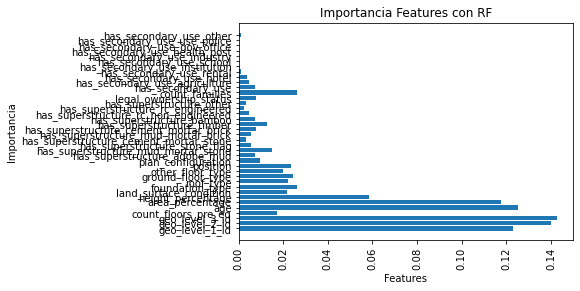

In [68]:
plt.barh(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.xticks(rotation=90) 
plt.show()

In [69]:
important_features = list(zip(X_train.columns, rf_model.feature_importances_))
sorted_features = sorted(important_features, key=lambda x: x[1])

In [81]:
type(sorted_features)

list

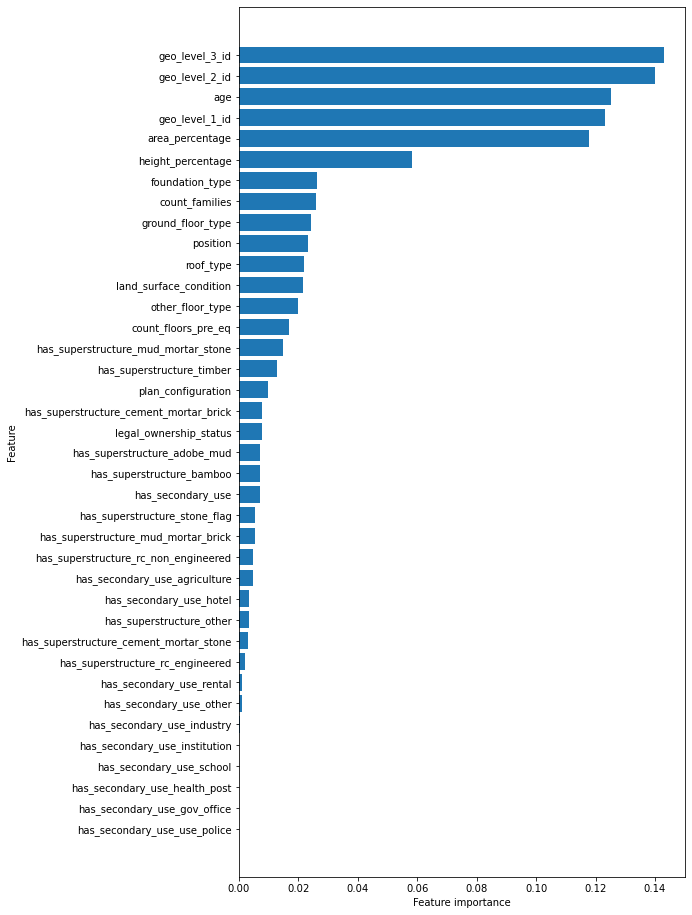

In [71]:
importance = []
feature_names = []
plt.figure(figsize=(8, 16))
n_features = X_train.shape[1]
for i in sorted_features:
    feature_names.append(i[0])
    importance.append(i[1])
    
plt.barh(range(n_features), importance)
plt.yticks(np.arange(n_features), feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
 ('count_floors_pre_eq', 0.017049456486940492),
 ('other_floor_type', 0.0200991204433194),
 ('land_surface_condition', 0.02171084925159366),
 ('roof_type', 0.02213881273487791),
 ('position', 0.02347080701209878),
 ('ground_floor_type', 0.024442280919832325),
 ('count_families', 0.026044620683833692),
 ('foundation_type', 0.026226822018109615),
 ('height_percentage', 0.05837223293382823),
 ('area_percentage', 0.1177515562760127),
 ('geo_level_1_id', 0.12319226319307224),
 ('age', 0.12512291181948398),
 ('geo_level_2_id', 0.14007754525369107),
 ('geo_level_3_id', 0.14291023965765856)]

In [ ]:
selected_features = selected_features = ['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'count_families',
 ];

In [16]:
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)

In [17]:
gs.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2018))]),
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 5],
                         'randomforestclassifier__n_estimators': [50, 100]})

In [18]:
from sklearn.metrics import f1_score

In [19]:
in_sample_preds = gs.predict(X_train)
f1_score(y_train, in_sample_preds, average='micro')

0.7625527628549501

In [20]:
in_sample_preds = gs.predict(X_test)
f1_score(y_test, in_sample_preds, average='micro')

0.7266936551485965

In [21]:
#test_values = pd.read_csv('test_values.csv', index_col='building_id')

In [22]:
test_values_subset = test_values[selected_features]
#test_values_subset = pd.get_dummies(test_values_subset)

In [23]:
predictions = gs.predict(test_values_subset)

In [24]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')

In [25]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [26]:
my_submission.head()

,damage_grade
building_id,
300051,2
99355,2
890251,2
745817,2
421793,2


In [27]:
my_submission.to_csv('submission.csv')

In [28]:
!head submission.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [29]:
my_submission.damage_grade.value_counts()

2    66945
3    16344
1     3579
Name: damage_grade, dtype: int64

In [30]:
rf_model =  RandomForestClassifier(random_state=2018)

In [31]:
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=2018)

In [32]:
# Gini importance
rf_model.feature_importances_

array([0.03003465, 0.05538934, 0.03401206, 0.03804201, 0.04124386,
       0.03450722, 0.01899939, 0.01286136, 0.20659857, 0.26212929,
       0.26618224])

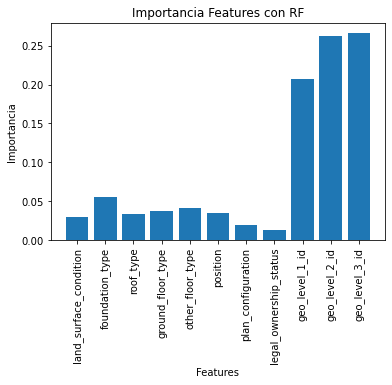

In [37]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.xticks(rotation=90) 
plt.show()

In [82]:
sorted_features

[('has_secondary_use_use_police', 2.6389498152766187e-05),
 ('has_secondary_use_gov_office', 4.0770890807999716e-05),
 ('has_secondary_use_health_post', 6.0703059697975965e-05),
 ('has_secondary_use_school', 0.0001052961216058757),
 ('has_secondary_use_institution', 0.00021891247232466303),
 ('has_secondary_use_industry', 0.0003643088699113411),
 ('has_secondary_use_other', 0.001128246545364119),
 ('has_secondary_use_rental', 0.001265735678785792),
 ('has_superstructure_rc_engineered', 0.0022443017120974107),
 ('has_superstructure_cement_mortar_stone', 0.003283260006869474),
 ('has_superstructure_other', 0.0033833783453500947),
 ('has_secondary_use_hotel', 0.0035582571920332864),
 ('has_secondary_use_agriculture', 0.004706900195770254),
 ('has_superstructure_rc_non_engineered', 0.004726491997777055),
 ('has_superstructure_mud_mortar_brick', 0.005583575584741516),
 ('has_superstructure_stone_flag', 0.005675875368879471),
 ('has_secondary_use', 0.007152364201619563),
 ('has_superstructur